In [ ]:
# Load Dataset
!git clone https://github.com/beotborry/DLDataset.git

Cloning into 'DLDataset'...
remote: Enumerating objects: 3721, done.
remote: Counting objects: 100% (3721/3721), done.
remote: Compressing objects: 100% (3721/3721), done.
remote: Total 16262 (delta 0), reused 3720 (delta 0), pack-reused 12541
Receiving objects: 100% (16262/16262), 2.69 GiB | 23.15 MiB/s, done.
Resolving deltas: 100% (44/44), done.
Checking out files: 100% (7554/7554), done.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Input, BatchNormalization, MaxPooling2D,Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

import numpy as np


In [ ]:

# Data Path
with_mask_paths = ["./DLDataset/with_mask/with_mask_" + str(i) + ".jpg" for i in range(1, 3725 + 1)]
without_mask_paths = ["./DLDataset/without_mask/without_mask_" + str(i) + ".jpg" for i in range(1, 3828 + 1)]


In [ ]:
# utils.py Codes

from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import matplotlib.pyplot as plt

def load_data_with_label(path_arr, data_arr, label_arr, img_size, _label):
    for path in path_arr:
        try:
            img = load_img(path, target_size = img_size)
            img = img_to_array(img)
            img = preprocess_input(img)
            data_arr.append(img)
            label_arr.append(_label)
        except:
            print(path)

def training_log_plot(history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(8,8))
    plt.subplot(2, 1, 1)
    plt.plot(accuracy, label = "TRNG_ACC")
    plt.plot(val_accuracy, label = "VAL_ACC")

    plt.ylabel("Accuracy")
    plt.title("Accuracy")
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(loss, label = "TRNG_LOSS")
    plt.plot(val_loss, label = "VAL_LOSS")

    plt.xlabel("Epoch")
    plt.ylabel("Cross Entropy")
    plt.title("Loss")
    plt.legend()

    plt.savefig("./fig.png")
    plt.show()

def export_model_summary(model):
    with open("report.txt", "w") as fh:
        model.summary(print_fn=lambda x: fh.write(x + '\n'))

In [ ]:

# Declare array for storing data & corresponding label
data = []
label = []

# Load with_mask data
load_data_with_label(path_arr=with_mask_paths,
                     data_arr=data,
                     label_arr=label,
                     img_size=(224, 224, 3),
                     _label = 1)

# Load without_mask data
load_data_with_label(path_arr=without_mask_paths,
                     data_arr=data,
                     label_arr=label,
                     img_size=(224, 224, 3),
                     _label = 0)

print("Data Load Done!")


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Data Load Done!


In [ ]:

# Convert to numpy array
data = np.array(data, dtype="float32")
label = np.array(label)

# Label one-hot encoding
_lb = LabelBinarizer()

label = _lb.fit_transform(label)
label = to_categorical(label)


In [ ]:

# Split data to train data and test data
(train_X, test_X, train_Y, test_Y) = train_test_split(data, label,
                                                      test_size=0.15,
                                                      stratify=label,
                                                      random_state=777,
                                                      shuffle=True)



In [ ]:

# Make CNN Model
CNN = Sequential([
    Input(shape=(224, 224, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), padding='SAME', activation='relu',
           kernel_regularizer=l2(5e-4)),
    Conv2D(32, (3, 3), padding='SAME', activation='relu',
           kernel_regularizer=l2(5e-4)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), padding='SAME', activation='relu',
           kernel_regularizer=l2(5e-4)),
    Conv2D(64, (3,3), padding='SAME', activation='relu',
           kernel_regularizer=l2(5e-4)),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), padding='SAME', activation='relu',
           kernel_regularizer=l2(5e-4)),
    Conv2D(128, (3,3), padding='SAME', activation='relu',
           kernel_regularizer=l2(5e-4)),
    Conv2D(128, (3,3), padding='SAME', activation='relu',
           kernel_regularizer=l2(5e-4)),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')

])


In [ ]:


# Declare epoch, batch size, optimizer
epochs = 30
batch_size = 100
optimizer = Adam(learning_rate=1e-4, decay = 1e-4/epochs)




In [ ]:


# Compile and training
CNN.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics=['accuracy'])

history = CNN.fit(train_X, train_Y,
                    batch_size=batch_size,
                    validation_split=0.1,
                    epochs = epochs)

# Model save
CNN.save("./checkpoint")


Epoch 1/30
58/58 [==============================] - 64s 885ms/step - loss: 0.7703 - accuracy: 0.6989 - val_loss: 0.5155 - val_accuracy: 0.8801
Epoch 2/30
58/58 [==============================] - 46s 795ms/step - loss: 0.5028 - accuracy: 0.8847 - val_loss: 0.4485 - val_accuracy: 0.9034
Epoch 3/30
58/58 [==============================] - 46s 799ms/step - loss: 0.4608 - accuracy: 0.8952 - val_loss: 0.4057 - val_accuracy: 0.9065
Epoch 4/30
58/58 [==============================] - 46s 799ms/step - loss: 0.4095 - accuracy: 0.9067 - val_loss: 0.3572 - val_accuracy: 0.9283
Epoch 5/30
58/58 [==============================] - 46s 802ms/step - loss: 0.3822 - accuracy: 0.9153 - val_loss: 0.3552 - val_accuracy: 0.9159
Epoch 6/30
58/58 [==============================] - 46s 802ms/step - loss: 0.3638 - accuracy: 0.9253 - val_loss: 0.3361 - val_accuracy: 0.9252
Epoch 7/30
58/58 [==============================] - 46s 799ms/step - loss: 0.3227 - accuracy: 0.9416 - val_loss: 0.3264 - val_accuracy: 0.9330

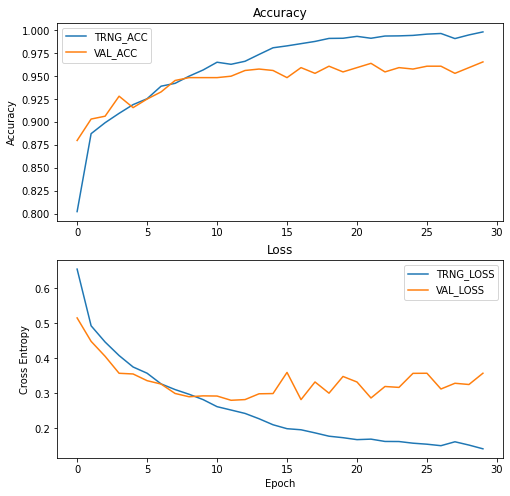

36/36 [==============================] - 4s 86ms/step - loss: 0.3010 - accuracy: 0.9682


[0.30102235078811646, 0.9682259559631348]

In [ ]:

# Draw Plot and Save
training_log_plot(history)

# Evaluate
CNN.evaluate(test_X, test_Y)


